In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Linear Regression (Tuseday)

## 0. importing the data

In [2]:
# import the data
df = pd.read_csv('C:/Users/dengd/Documents/GitHub/IronDuo/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

# delet one column
df.drop(columns=['effective_to_date'], inplace = True)

### 1. X-y split (y is the target variable, which is the total claim amount)

In [3]:
X = df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

### 2. Getting numerical and categorical columns

### 3. remove outliers

In [4]:
X['number_of_open_complaints'] = X['number_of_open_complaints'].astype('category')

In [5]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [6]:
numericalX = X.select_dtypes(include=[np.number])
categoricalX = X.select_dtypes(include=[np.object])

C:\Users\dengd\AppData\Local\Temp\ipykernel_8924\3674198500.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(include=[np.object])


### 4.concatenate the numerical and catergorical columns

In [7]:
X = pd.concat([pd.get_dummies(categoricalX,drop_first=True),
               remove_outliers(numericalX)],
              axis=1)

In [8]:
X

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,4809.0,48029,61.0,7,52,NaN
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,2228.0,92260,64.0,3,26,1.0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,14947.0,22139,100.0,34,31,2.0
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,NaN,49078,97.0,10,3,2.0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,9025.0,23675,117.0,33,31,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,15563.0,61541,NaN,12,40,7.0
10685,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,5259.0,61146,65.0,7,68,6.0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,NaN,39837,NaN,11,63,2.0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,1,0,11971.0,64195,158.0,0,27,6.0


In [9]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

### 4. Train-test split.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state= 34)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
6274,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,5384.0,82045,78.0,14,68,5.0
5619,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,2596.0,28706,72.0,3,65,1.0
7915,0,0,1,0,1,0,0,0,1,0,...,0,1,1,0,3031.0,56677,86.0,7,31,1.0


### 5. Standardize the data (after the data split).

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### 6. Apply linear regression.

In [16]:
# import statsmodels.api as sm

# # Fit a linear regression model using statsmodels
# X_train_const = sm.add_constant(X_train) # adding a constant in the model
# model = sm.OLS(y_train, X_train_const).fit()

# # Print the summary of the regression results
# print(model.summary())

In [17]:
import statsmodels.api as sm

# Fit a linear regression model using statsmodels
X_train_const = sm.add_constant(X_train_s) # adding a constant in the model
model = sm.OLS(y_train, X_train_const).fit()

In [18]:
X_test_const = sm.add_constant(X_test_s) # adding a constant in the model
model_test = sm.OLS(y_test, X_test_const).fit() 

In [19]:
# Print the summary of the regression results
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:19:29   Log-Likelihood:                -16475.
No. Observations:                2677   AIC:                         3.305e+04
Df Residuals:                    2629   BIC:                         3.333e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        399.1680      2.263    176.355      0.0

### 7. model parameters

In [20]:
model=LinearRegression()    # model
model.fit(X_train_s, y_train)   # model train

LinearRegression()

In [21]:
model.coef_

array([[ 2.57379393e+00,  1.02011185e+00,  1.97337584e+00,
        -4.02495909e+00, -2.88601962e+00,  2.34413919e-01,
        -3.81083861e+00, -3.19983880e+00,  1.73260606e+00,
        -2.00976289e+00,  1.10167715e+00,  1.79120708e-01,
         3.47843943e+00,  1.61793324e+00,  3.38280643e+01,
         7.10676821e+00,  1.73316028e+02,  8.07006848e+01,
         1.47461961e+00,  2.92072276e+01, -6.21930019e+13,
        -4.25708498e+14, -1.74170642e+00, -2.29129438e+00,
         4.90483338e+13,  6.06891778e+13,  6.95814095e+13,
         1.87865262e+14,  2.83797233e+14,  2.64693855e+14,
         4.31233460e+00,  1.26592924e+00,  1.05774142e+00,
        -8.91673855e-01, -5.21950796e-02,  4.34357450e-01,
         6.36621626e-01, -2.78944199e+00, -1.07493620e+00,
        -1.35803808e+00, -2.26720726e+00,  2.70652684e+00,
         7.71195831e+00, -1.88267187e+00, -6.54139466e+00,
         1.13362881e+02,  4.44011869e+00, -2.26017127e+00,
         4.50599559e+00]])

### 8. Making prediction

In [22]:
y_pred = model.predict(X_test_s)  # model prediction
y_pred_train = model.predict(X_train_s)

In [23]:
y_test = y_test.to_numpy()

In [24]:
len(y_test)

2677

# Evaluating Model Performance (Wednesday)

In [25]:
result= pd.DataFrame({"y_test": list(y_test),"y_pred": list(y_pred)})
result

,y_test,y_pred
0,[422],[507.69384527182217]
1,[564],[417.03925140545493]
2,[111],[52.086707317389425]
3,[366],[468.0945929955918]
4,[466],[382.14988996210127]
...,...,...
2672,[633],[532.113984371055]
2673,[595],[503.7732714134653]
2674,[699],[507.6576131280176]
2675,[412],[466.32159983899805]


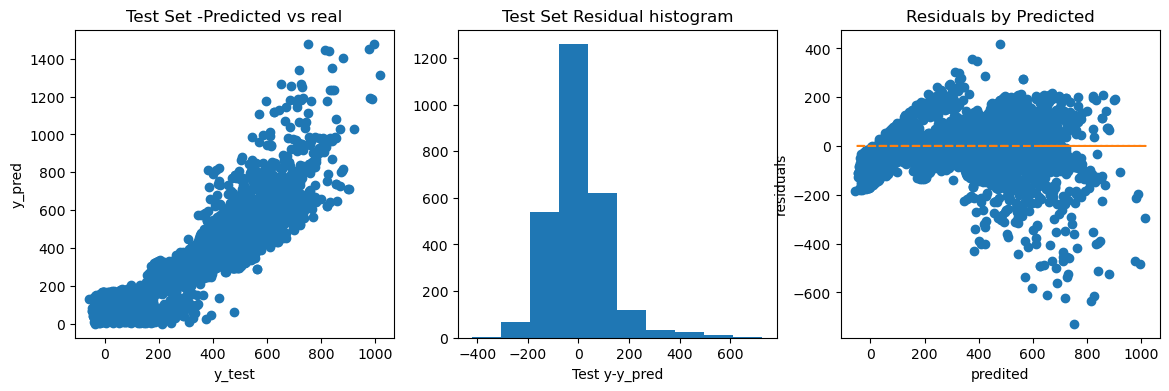

In [26]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test-y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred, y_pred - y_test, "o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

C:\Users\dengd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

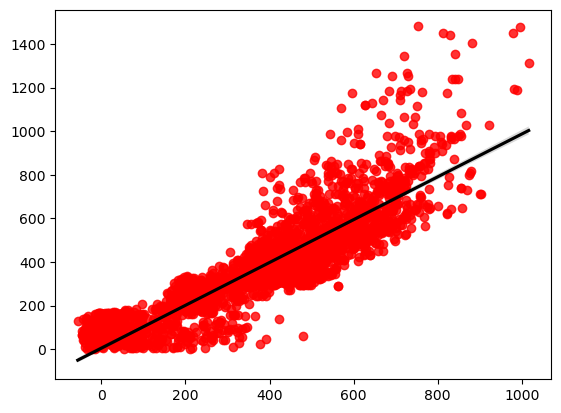

In [27]:
yp_ = y_pred
yt_ = y_test
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

### 2. Error metrics

In [28]:
import math
print(mse(y_test,y_pred)) # MSE(Mean squared error)
print(mae(y_test,y_pred)) # MAE (Mean Absolute Error)
print(math.sqrt(mae(y_test,y_pred)))# RMSE(Root Mean Square Error)
print(mse(y_train,y_pred_train)) # Mean Squared Error

13491.642954969453
85.39076631250897
9.240712435332515
14442.056332692151


In [29]:
# R squared
R2= r2_score(y_test,y_pred)
R2

0.7521695062416929

In [30]:
# adjusted R squared
R2_test=model.score(X_test_s,y_test)
R2_train=model.score(X_train_s,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7475468590417853

### 3. Feature Importances

In [31]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
21,policy_type_special auto,4.257085e+14
28,policy_special l2,2.837972e+14
29,policy_special l3,2.646939e+14
27,policy_special l1,1.878653e+14
26,policy_personal l3,6.958141e+13
20,policy_type_personal auto,6.219300e+13
25,policy_personal l2,6.068918e+13
24,policy_personal l1,4.904833e+13
16,location_code_suburban,1.733160e+02
45,monthly_premium_auto,1.133629e+02


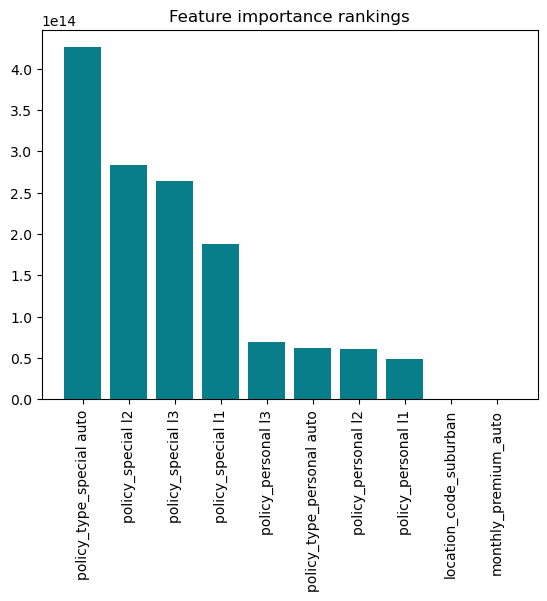

In [32]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='education', ylabel='total_claim_amount'>

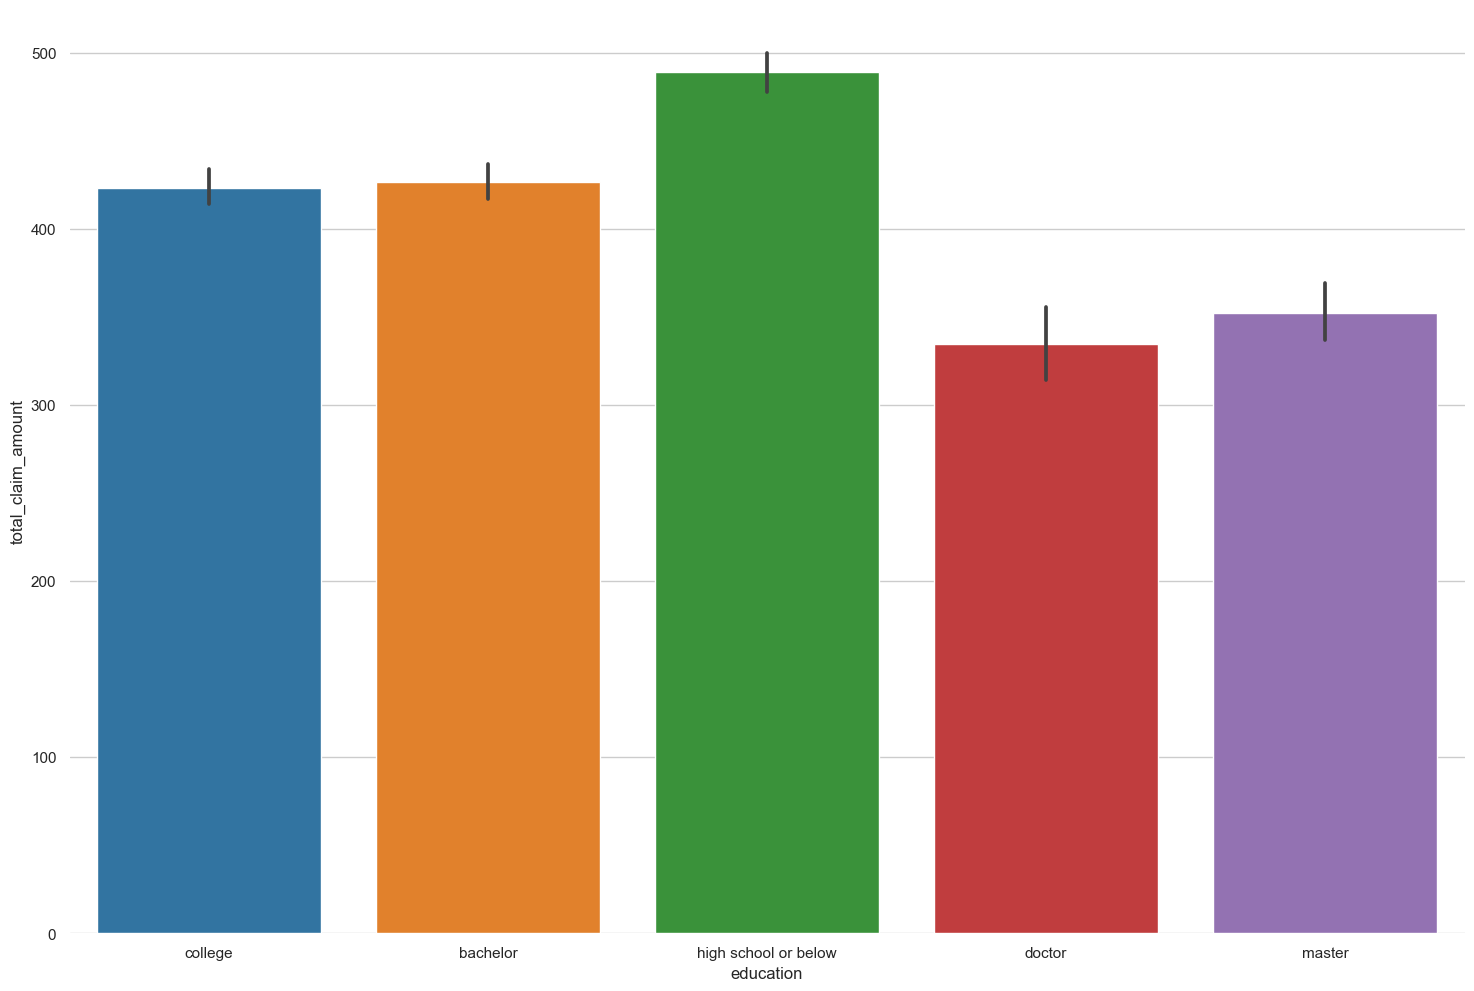

In [33]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="education", y='total_claim_amount', data=df, ax=ax)

# Comparing regression models(20.02.2023)

### fit the models LinearRegression,Lasso and Ridge and compare the model performances.

#### OLS

In [34]:
# SSR:sum of squared errors between the predicted and actual values of the dependent variable. OLS does not have restriction on parameters.
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.744444977250147, Test -> 0.7522988265432257


#### Lasso
- It could drop features and make it a feature selection technique 

In [35]:
# Lasso extend the OLS, and add a penalty item to minimized the SSR.
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7443564756434873, Test -> 0.7524711791009966


<b> Ridge

In [36]:
# adds a penalty term to the sum of squared errors, but the penalty term is the sum of squares of the coefficients instead of the absolute value. 
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.41535544029775573, Test -> 0.3885622183959445


<b> ElasticNet

In [37]:
# it adds both the L1 (Lasso) and L2 (Ridge) penalty terms to the sum of squared errors, which results in a constraint that can shrink some coefficients to zero
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.7083636801007319, Test -> 0.7125553789872102


In [38]:
### Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score

# Create a list of models
models = [LinearRegression(), Lasso(alpha=0.05), Ridge(alpha=10000), ElasticNet(alpha=0.1)]
def train_test_models(X_train, y_train,X_test, y_test, model):

    # Test the models and get the accuracy scores
    results = {}

    for model in models:
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        print(f"{model.__class__.__name__}: Train -> {train_score:.4f}, Test -> {test_score:.4f}") 

In [39]:
train_test_models(X_train, y_train,X_test, y_test, model)

LinearRegression: Train -> 0.7444, Test -> 0.7523
Lasso: Train -> 0.7444, Test -> 0.7525
Ridge: Train -> 0.4154, Test -> 0.3886
ElasticNet: Train -> 0.7084, Test -> 0.7126


# Features selection

### 1. Recursive feature elimination(RFE)

In [41]:
# Use feature selection techniques (P-Value, RFE) to select subset of features to train the model with(if necessary).
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 10, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train_RFE = selector.transform(X_train)
X_test_RFE  = selector.transform(X_test)

X_train_RFE = pd.DataFrame(X_train, columns=kept_features)
X_test_RFE  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 fe

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
7918,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,7427.0,78294,92.0,6,35,3.0
7132,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,8678.0,62366,108.0,22,87,8.0
1697,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,9802.0,84429,123.0,11,2,6.0
2872,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,8555.0,81611,81.0,6,49,2.0
2891,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,2719.0,14030,72.0,11,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,4513.0,34558,113.0,32,24,1.0
6230,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,7123.0,21835,92.0,2,83,3.0
6454,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2409.0,54491,66.0,3,97,1.0
1039,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,4362.0,58842,110.0,6,74,1.0


In [42]:
train_test_models(X_train_RFE, y_train, X_test_RFE, y_test, model)

LinearRegression: Train -> 0.6719, Test -> 0.6904
Lasso: Train -> 0.6719, Test -> 0.6905
Ridge: Train -> 0.1602, Test -> 0.1626
ElasticNet: Train -> 0.6132, Test -> 0.6346


### 2. P-Value

In [48]:
import statsmodels.api as sm

# data split
X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

# add constant to the model
X_train = sm.add_constant(X_train) # add constant term for intercept
X_test = sm.add_constant(X_test)

# fit ordinary least squares (OLS) model on the training data
ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()

# get the p-values for each feature
p_values = result.pvalues

# select features with p-value less than 0.05
sig_features = p_values[p_values < 0.05].index

X_train_sig = X_train[sig_features]
X_test_sig = X_test[sig_features]

print("Final selected features: ")
display(X_train_sig)

Final selected features: 


,const,response_yes,education_high school or below,education_master,employment_status_medical leave,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_type_special auto,policy_personal l1,policy_special l1,renew_offer_type_offer2,vehicle_size_small,income,monthly_premium_auto,months_since_last_claim,number_of_policies
7918,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,78294,92.0,6,3.0
7132,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,62366,108.0,22,8.0
1697,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,84429,123.0,11,6.0
2872,1.0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,81611,81.0,6,2.0
2891,1.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,14030,72.0,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,34558,113.0,32,1.0
6230,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,21835,92.0,2,3.0
6454,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,54491,66.0,3,1.0
1039,1.0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,58842,110.0,6,1.0
